    
 #Ejercicios 

10. The  classic Olvetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use  stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters(using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


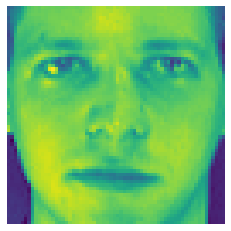

In [2]:
# Import del dataset
olivetti = fetch_olivetti_faces()

test_image = olivetti['images'][0]
plt.imshow(test_image)
plt.axis('off');plt.show()

In [3]:
# StratifiedShuffleSplit para descomponer todo en 3 sets
X,y = olivetti['data'],olivetti['target']

## Primer split para separar el train_set
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.4,random_state=42)
train_idx,test_valid_idx = list(sss.split(X,y))[0]

X_train,X_test_valid = X[train_idx],X[test_valid_idx]
y_train,y_test_valid = y[train_idx],y[test_valid_idx]

## Segundo split para separar un validation set y un test set
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.5,random_state=42)
valid_idx,test_idx = list(sss.split(X_test_valid,y_test_valid))[0]

X_valid,X_test = X_test_valid[valid_idx],X_test_valid[test_idx]
y_valid,y_test = y_test_valid[valid_idx],y_test_valid[test_idx]
# Del total, ahora debería haber 0.6 en el training set, 0.2 en validation set y 0.2 en test set.

In [ ]:
# Aseguremos que todos los sets tienen más o menos la misma proporción de instancias!
#for y in (y_train,y_test,y_valid):
#  (unique, counts) = np.unique(y, return_counts=True)
#  print(unique,counts/len(y))

In [ ]:
# Clustering de las imágenes con k_means
K = []
score = []
inertia = []
for k in range(10,150,10):
  kmeans = KMeans(n_clusters=k,n_init=5,random_state=42)
  y_pred = kmeans.fit_predict(X_train)
  K.append(k)
  score.append(silhouette_score(X_train,y_pred))
  inertia.append(kmeans.inertia_)

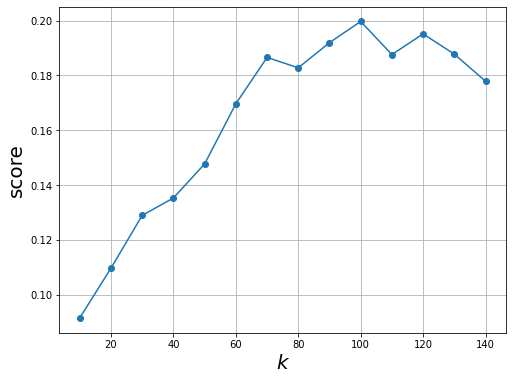

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(K,score,'o-')
plt.xlabel('$k$',size=20)
plt.ylabel('score',size=20)
plt.grid()
plt.show()

In [ ]:
#plt.figure(figsize=(8,6))
#plt.plot(K,inertia,'o-')
#plt.xlabel('$k$',size=20)
#plt.ylabel('score',size=20)
#plt.grid()
#plt.show()

El valor óptimo de clusters parece estar entre 90 y 110

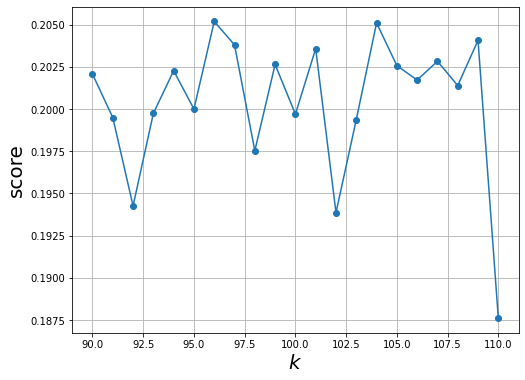

In [ ]:
# Búsqueda más fina
K = []
score = []
for k in range(90,111):
  kmeans = KMeans(n_clusters=k,random_state=42)
  y_pred = kmeans.fit_predict(X_train)
  K.append(k)
  score.append(silhouette_score(X_train,y_pred))

plt.figure(figsize=(8,6))
plt.plot(K,score,'o-')
plt.xlabel('$k$',size=20)
plt.ylabel('score',size=20)
plt.grid()
plt.show()

In [4]:
# Training con valor óptimo según silhouette_score
kmeans = KMeans(n_clusters=95,random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [16]:
# Visualización de los clusters
def get_cluster(n,array=X_train):
  return array[y_pred==n]

def plot_cluster(n,array=X_train):
  for image in get_cluster(n,array=array):
    plt.imshow(image.reshape(64,-1))
    plt.axis('off')
    plt.show()

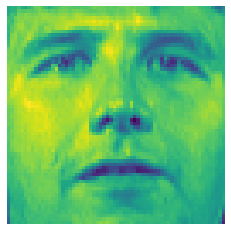

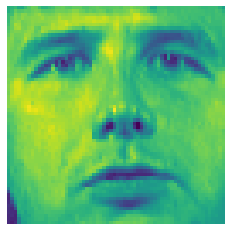

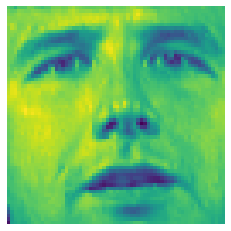

In [17]:
plot_cluster(8)

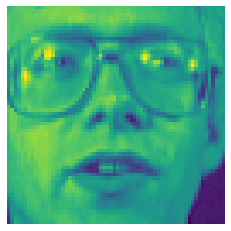

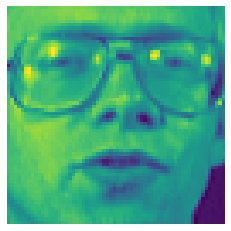

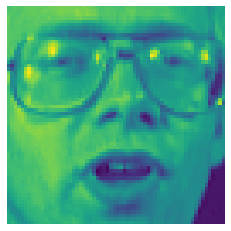

In [19]:
plot_cluster(87)

11. Continuing with the Olivetti faces dataset, train a classifier to
predict which person is represented in each picture, and evaluate
it on the validation set. Next, use K-Means as a dimensionality
reduction tool, and train a classifier on the reduced set. Search for
the number of clusters that allows the classifier to get the best
performance: what performance can you reach? What if you
append the features from the reduced set to the original features
(again, searching for the best number of clusters)?

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
# Probemos dos rápido y veamos qué onda 
svm_clf = SVC(random_state=42)
rf_clf = RandomForestClassifier(n_jobs=-1,random_state=42)

for clf in (svm_clf,rf_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_valid)
  print(clf.__class__.__name__,accuracy_score(y_true=y_valid,y_pred=y_pred))

SVC 0.8875
RandomForestClassifier 0.925


In [31]:
# Entrenamos un clasificador con las features reducidas!
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ('kmeans',KMeans(random_state=42)),
                    ('rf_clf',RandomForestClassifier(random_state=42))
                    ])

from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2,110))
grid_clf = GridSearchCV(pipeline,param_grid,cv=3,verbose=2)

grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.7s
[CV] END ...............................kmeans

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(random_state=42)),
                                       ('rf_clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 110)}, verbose=2)

In [33]:
print(grid_clf.best_params_,grid_clf.best_score_)
print("Accuracy over the validation set:",grid_clf.score(X_valid,y_valid))

{'kmeans__n_clusters': 109} 0.7333333333333334
Accuracy over the validation set: 0.775


12. Train a Gaussian mixture model on the Olivetti faces dataset. To
speed up the algorithm, you should probably reduce the dataset’s
dimensionality (e.g., use PCA, preserving 99% of the variance).
Use the model to generate some new faces (using the `sample()`
method), and visualize them (if you used PCA, you will need to
use its `inverse_transform()` method). Try to modify some
images (e.g., rotate, flip, darken) and see if the model can detect
the anomalies (i.e., compare the output of the `score_samples()`
method for normal images and for anomalies).

In [34]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
print(X_train_reduced.shape)

gm = GaussianMixture(n_components=40,n_init=5,random_state=42,verbose=1)
gm.fit(X_train_reduced)

(240, 177)
Initialization 0
Initialization converged: True
Initialization 1
Initialization converged: True
Initialization 2
Initialization converged: True
Initialization 3
Initialization converged: True
Initialization 4
Initialization converged: True


GaussianMixture(n_components=40, n_init=5, random_state=42, verbose=1)

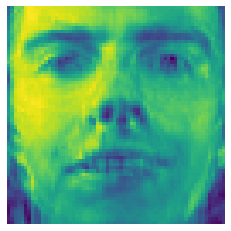

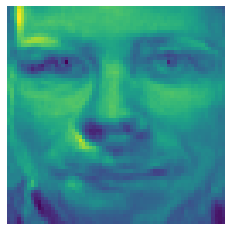

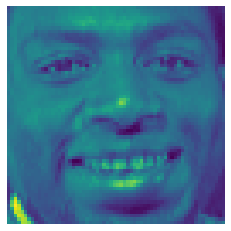

In [40]:
X_new,y_new = gm.sample(3)
X_new_transformed = pca.inverse_transform(X_new)

for image in X_new_transformed:
  plt.imshow(image.reshape(64,-1))
  plt.axis('off');plt.show()